In [1]:
from high_level_tdc import *
from time import sleep
from matplotlib import pyplot as plt
import numpy as np

/home/pi/kilom_spi/high_level_tdc.py:20: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.
  GPIO.setup(2, GPIO.OUT)


In [2]:
import M8195A as awg
awg_ip="192.168.0.208"
period="2u"

In [3]:
##################################################
##                  channel 1                   ##
##################################################

awg.pulser(
    ip=awg_ip,
    trace=1,
    period=period,
    width="5n",
    leading_edge="2n",
    trailing_edge="2n",
    on_val="-500m",
    idle_val="0",
    delay="200n"
)

target ip : 192.168.0.208
connect to device ...
*IDN?
Keysight Technologies,M8195A,DE57700132,4.0.0.0-1
success!
NOTE: overriding sample rate to match desired period!
attempting to set sample rate : 64960000000.000000 Hz
success!
preparing data for channel 1
sending data ...
set output voltage ...
Output 1 on ...
RUN!
close socket


In [4]:
##################################################
##                  channel 2                   ##
##################################################

awg.pulser(
    ip=awg_ip,
    trace=2,
    period=period,
    width="5n",
    leading_edge="2n",
    trailing_edge="2n",
    on_val="-500m",
    idle_val="0",
    delay="211n"
)

target ip : 192.168.0.208
connect to device ...
*IDN?
Keysight Technologies,M8195A,DE57700132,4.0.0.0-1
success!
NOTE: overriding sample rate to match desired period!
attempting to set sample rate : 64960000000.000000 Hz
success!
preparing data for channel 2
sending data ...
set output voltage ...
Output 2 on ...
RUN!
close socket


In [9]:
def test_pulse_delay(delay):
    
  awg.pulser(
      ip=awg_ip,
      trace=2,
      period=period,
      width="5n",
      leading_edge="2n",
      trailing_edge="2n",
      on_val="-500m",
      idle_val="0",
      delay=211e-9+delay
  )

In [10]:
test_pulse_delay(20e-9)

target ip : 192.168.0.208
connect to device ...
*IDN?
Keysight Technologies,M8195A,DE57700132,4.0.0.0-1
success!
NOTE: overriding sample rate to match desired period!
attempting to set sample rate : 64960000000.000000 Hz
success!
preparing data for channel 2
sending data ...
set output voltage ...
Output 2 on ...
RUN!
close socket


In [14]:
data = acquire(
    trig_chan=0,
    channels = [0,1],
    window_L=-1000e-9,
    window_R=1001e-9,
    n = 5
)

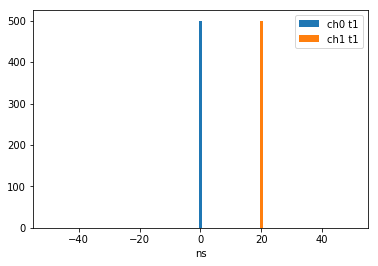

In [12]:
plt.hist(np.array(data[0]["t1"])*1e9,bins=np.linspace(-50,50,100), label ="ch0 t1")
plt.hist(np.array(data[1]["t1"])*1e9,bins=np.linspace(-50,50,100), label ="ch1 t1")
plt.legend()
plt.xlabel("ns")

plt.show()

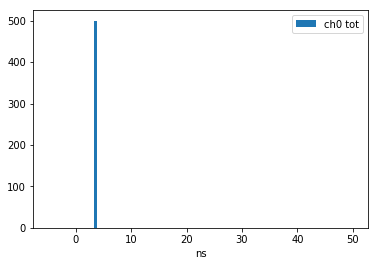

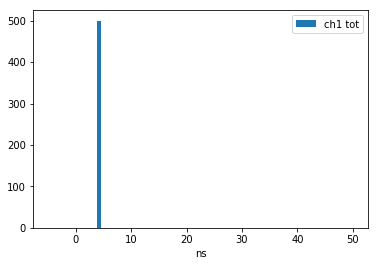

In [13]:
bins=np.linspace(-5,50,100)
plt.hist(np.array(data[0]["tot"])*1e9,bins=bins, label ="ch0 tot")
plt.legend()
plt.xlabel("ns")
plt.show()

plt.hist(np.array(data[1]["tot"])*1e9,bins=bins, label ="ch1 tot")
plt.legend()
plt.xlabel("ns")
plt.show()

In [20]:
data[1]["t1"]

[1.9583333329964425e-08,
 1.9583333329964425e-08,
 1.9583333329964425e-08,
 1.9583333329964425e-08,
 1.9583333329964425e-08]